In [ ]:
import os 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
datagen_train = ImageDataGenerator(
    rescale=1. /255,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen_test_1 = ImageDataGenerator(
    rescale=1. /255,
)

data_gen_train = datagen_train.flow_from_directory(
    '/content/DataSet/train', 
    target_size=(48,48),
    batch_size=32,
    shuffle=True, 
    color_mode='grayscale',
    class_mode='categorical'
  )

data_gen_test = datagen_test_1.flow_from_directory(
    '/content/DataSet/test',
    target_size=(48,48), 
    batch_size=32, 
    shuffle=True, 
    color_mode='grayscale',
    class_mode='categorical'
  )

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(7, activation='softmax'),
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(data_gen_train, epochs=150, validation_data=data_gen_test)

Epoch 1/150
449/449 [==============================] - 23s 51ms/step - loss: 1.7791 - accuracy: 0.2614 - val_loss: 1.6957 - val_accuracy: 0.3103
Epoch 2/150
449/449 [==============================] - 23s 51ms/step - loss: 1.6760 - accuracy: 0.3248 - val_loss: 1.5046 - val_accuracy: 0.4168
Epoch 3/150
449/449 [==============================] - 23s 50ms/step - loss: 1.5224 - accuracy: 0.4066 - val_loss: 1.3277 - val_accuracy: 0.4851
Epoch 4/150
449/449 [==============================] - 23s 50ms/step - loss: 1.4154 - accuracy: 0.4520 - val_loss: 1.2845 - val_accuracy: 0.5054
Epoch 5/150
449/449 [==============================] - 22s 50ms/step - loss: 1.3503 - accuracy: 0.4828 - val_loss: 1.2089 - val_accuracy: 0.5385
Epoch 6/150
449/449 [==============================] - 23s 51ms/step - loss: 1.3094 - accuracy: 0.5001 - val_loss: 1.2058 - val_accuracy: 0.5343
Epoch 7/150
449/449 [==============================] - 23s 51ms/step - loss: 1.2769 - accuracy: 0.5135 - val_loss: 1.1864 - val_ac

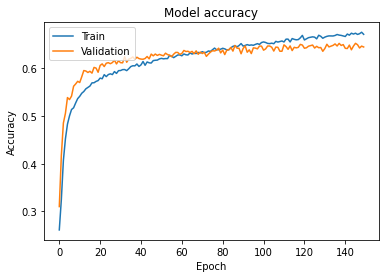

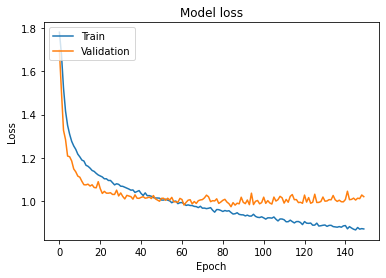

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()